In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fs = 9
plt.rcParams["font.size"] = fs
plt.rcParams["axes.titlesize"] = plt.rcParams["font.size"]
plt.rcParams["lines.linewidth"] = 0

def cm2inch(x,y): return [x/2.54, y/2.54]

In [8]:
D = pd.read_csv("../result/test1.csv")

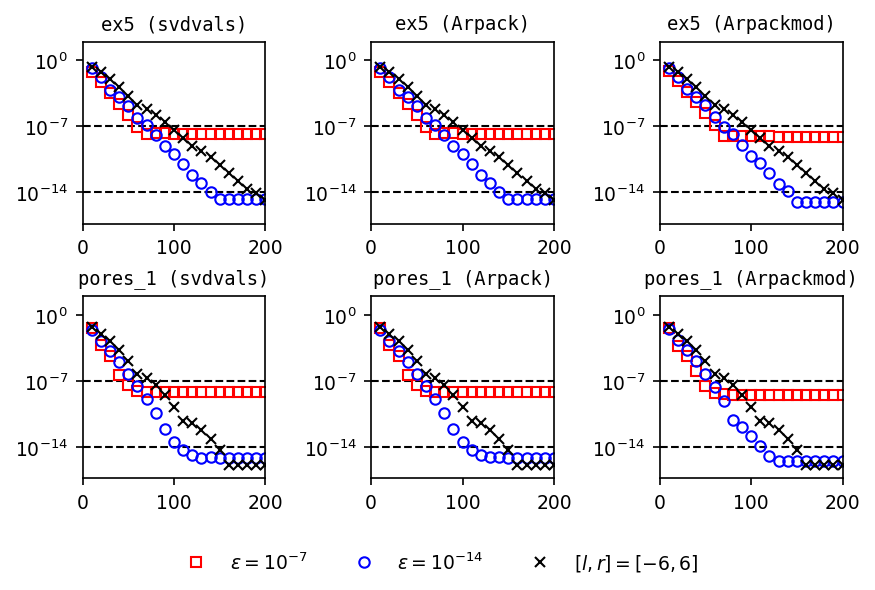

In [28]:
fig, ax = plt.subplots(2, 3, figsize=cm2inch(15, 10), dpi=150)

for i, matname in enumerate(["ex5", "pores_1"]):
    for j, method in enumerate(["svdvals", "Arpack", "Arpackmod"]):
        m = D["m"]
        y1 = D["%s_%d_%s" % (matname, -7, method)]
        y2 = D["%s_%d_%s" % (matname, -14, method)]
        y3 = D["%s_wide" % (matname)]
        
        p1, = ax[i][j].plot(m, y1, marker="s", c="r", markeredgecolor="r", markerfacecolor="None", ms=5)
        p2, = ax[i][j].plot(m, y2, marker="o", c="b", markeredgecolor="b", markerfacecolor="None", ms=5)
        p3, = ax[i][j].plot(m, y3, marker="x", lw=0, c="k", ms=5)
        
        ax[i][j].plot([0,np.max(m)], [1e-7, 1e-7], c="k", ls="--", lw=1, zorder=-10)
        ax[i][j].plot([0,np.max(m)], [1e-14, 1e-14], c="k", ls="--", lw=1, zorder=-10)
        ax[i][j].set_yscale("log")
        ax[i][j].set_title("%s (%s)" % (matname, method), fontfamily="DejaVu Sans Mono")
        ax[i][j].set_ylim(5e-18,1e2)
        ax[i][j].set_yticks([1e-14, 1e-7, 1e0])
        ax[i][j].set_xticks([0, 100, 200])
        ax[i][j].set_xlim(0, 200)
        
        
fig.tight_layout()
fig.legend((p1, p2, p3), ["$\\epsilon=10^{-7}$", "$\\epsilon=10^{-14}$", "$[l,r]=[-6,6]$"],
           loc=8, ncol=3, frameon=False)

plt.subplots_adjust(bottom=0.18)
plt.savefig("fig-test1.pdf")
plt.show()